<a href="https://colab.research.google.com/github/BalavSha/Deep-Learning/blob/main/Generative_Adversarial_Networks(GANs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**Generative Adversarial Network(GAN)**</center>

## **Text Generation**

Build a sequential model for a **LSTM (Long Short-Term Memory)** neural network:

In [ ]:
# Create a sequential model
regressor = Sequential()

# Add the first LSTM layer with 50 units and 'relu' activation function
# Set 'return_sequences' to True as we will add more LSTM layers
# The input shape is the shape of the training data
regressor.add(LSTM(units=50, activation='relu', return_sequences=True, \
                   input_shape=(X_train.shape[1], 5)))

# Add a dropout layer to prevent overfitting
regressor.add(Dropout(0.2))

# Add the second LSTM layer with 60 units and 'relu' activation function
# Set 'return_sequences' to True as we will add more LSTM layers
regressor.add(LSTM(units=60, activation='relu', return_sequences=True))

# Add another dropout layer
regressor.add(Dropout(0.3))

# Add the third LSTM layer with 80 units and 'relu' activation function
# Set 'return_sequences' to True as we will add more LSTM layers
regressor.add(LSTM(units=80, activation='relu', return_sequences=True))

# Add another dropout layer
regressor.add(Dropout(0.4))

# Add the fourth LSTM layer with 120 units and 'relu' activation function
regressor.add(LSTM(units=120, activation='relu'))

# Add another dropout layer
regressor.add(Dropout(0.5))

# Add a dense layer with 1 unit as the output layer
regressor.add(Dense(units=1))


## **Extending NLP Sequence Models to Generate Text:**

**Steps Involved are:**

*   **Dataset cleaning** encompasses the conversion of the case to lowercase, removing punctuation.

*   **Tokenization** is breaking up a character sequence into specified units called tokens.

*   **Padding** is a way to make input sentences of different sizes the same by padding them.

*   **Padding the sequences** refers to making sure that the sequences have a uniform length.

*   **Stemming** is truncating words down to their stem. For example, the words *rainy* and *raining* both have the stem *rain*.

### ***--> Dataset Cleaning:***

*Create a function to clean text and returns list of words after cleaning. Converting all words in lowercase and encoding for character standardization.*

In [ ]:
# Define a function to clean text
def clean_text(txt):

    # Remove punctuation from the text and convert it to lowercase
    txt = "".join(v for v in txt if v not in string.punctuation).lower()

    # Encode the text as utf-8 and decode it as ascii, ignoring any errors
    txt = txt.encode("utf8").decode("ascii", 'ignore')
    
    # Return the cleaned text
    return txt

# Apply the clean_text function to all headlines in the 'all_headlines' list
corpus = [clean_text(x) for x in all_headlines]

# Print the first 10 elements of the 'corpus' list
corpus[:10]

### ***--> Generating a Sequence and Tokenization:***

In [ ]:
# import tokenizer class from keras
from tensorflow.keras.preprocessing.text import Tokenizer

# Create a Tokenizer object
tokenizer = Tokenizer()

# Define a function to get sequences of tokens from a corpus
def get_seq_of_tokens(corpus):

    # Fit the tokenizer on the corpus
    tokenizer.fit_on_texts(corpus)

    # Get the total number of words in the tokenizer's word index
    all_words = len(tokenizer.word_index) + 1

    # Initialize an empty list to store the input sequences
    input_seq = []

    # Iterate over each line in the corpus
    for line in corpus:

        # Convert the line to a sequence of tokens
        token_list = tokenizer.texts_to_sequences([line])[0]

        # Iterate over each token in the token list
        for i in range(1, len(token_list)):

            # Get the n-gram sequence of tokens
            n_gram_sequence = token_list[:i+1]
            
            # Append the n-gram sequence to the input sequences list
            input_seq.append(n_gram_sequence)

    # Return the input sequences and the total number of words
    return input_seq, all_words

# Get the sequences of tokens and the total number of words from the 'corpus' list
your_sequences, all_words = get_seq_of_tokens(corpus)

# Print the first 10 elements of the 'your_sequences' list
your_sequences[:10]

### ***--> Padding Sequences***

*Create a function to pad each Sequence to make their lengths equal to match length of longest sequence in the text Corpus*

In [ ]:
# Define a function to generate padded sequences
def generate_padded_sequences(input_seq):

    # Get the maximum sequence length
    max_sequence_len = max([len(x) for x in input_seq])

    # Pad the input sequences with zeros, in the beginning of sentences
    input_seq = np.array(pad_sequences(input_seq, maxlen=max_sequence_len, padding='pre'))

    # Split the input sequences into predictors and label
    predictors, label = input_seq[:, :-1], input_seq[:, -1]

    # Convert the label to categorical format
    label = keras.utils.to_categorical(label, num_classes=all_words)

    # Return the predictors, label, and maximum sequence length
    return predictors, label, max_sequence_len

# Generate padded sequences from the 'your_sequences' list
predictors, label, max_sequence_len = generate_padded_sequences(your_sequences)

------

------

#### **Building LSTM Model to generate new news headlines using the historical news information from the dataset**

*Important required libraries*

In [ ]:
# Import the pad_sequences function from the Keras library
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Import the Sequential class from the Keras library
from tensorflow.keras.models import Sequential

# Import the Embedding, LSTM, Dense, and Dropout layers from the Keras library
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Import the keras.utils module as ku
import tensorflow.keras.utils as ku

# Import the Tokenizer class from the Keras library
from tensorflow.keras.preprocessing.text import Tokenizer

# Import the pandas library as pd
import pandas as pd
# Import the numpy library as np
import numpy as np

# Import the EarlyStopping callback from the Keras library
from tensorflow.keras.callbacks import EarlyStopping

# Import the string and os modules
import string, os

# Import the warnings module
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

*Load the Article dataset and display its length:*
--> **Load the Articles.csv dataset in the colab folder first**

In [ ]:
# Set the directory path
your_dir = '/content/'

# Initialize an empty list to store the headlines
all_headlines = []

# Iterate over each file in the directory
for filename in os.listdir(your_dir):

    # Check if the filename contains 'Articles'
    if 'Articles' in filename:

        # Read the CSV file into a DataFrame
        article_df = pd.read_csv(your_dir + filename)

        # Extend the headlines list with the values from the 'headline' column
        all_headlines.extend(list(article_df.headline.values))

        # Break out of the loop
        break

# Filter out any headlines with the value 'Unknown'
all_headlines = [h for h in all_headlines if h != "Unknown"]

# Print the length of the 'all_headlines' list
len(all_headlines)

831

*Create a function to return a list of cleaned words. Convert the text to lowercase and encode it with with "utf-8" for character standardization.*

In [ ]:
# Define a function to clean text
def clean_text(txt):

    # Remove punctuation from the text and convert it to lowercase
    txt = "".join(v for v in txt if v not in string.punctuation).lower()

    # Encode the text as utf-8 and decode it as ascii, ignoring any errors
    txt = txt.encode("utf8").decode("ascii", 'ignore')

    # Return the cleaned text
    return txt

# Apply the clean_text function to all headlines in the 'all_headlines' list
corpus = [clean_text(x) for x in all_headlines]

# Print headlines of index(60 - 80) of the 'corpus' list
corpus[60:80]

['lets go for a win on opioids',
 'floridas vengeful governor',
 'how to end the politicization of the courts',
 'when dr king came out against vietnam',
 'britains trains dont run on time blame capitalism',
 'questions for no license plates here using art to transcend prison walls',
 'dry spell',
 'are there subjects that should be offlimits to artists or to certain artists in particular',
 'that is great television',
 'thinking in code',
 'how gorsuchs influence could be greater than his vote',
 'new york today how to ease a hangover',
 'trumps gifts to china',
 'at penn station rail mishap spurs large and lasting headache',
 'chemical attack on syrians ignites worlds outrage',
 'adventure is still on babbos menu',
 'swimming in the fast lane',
 'a national civics exam',
 'obama adviser is back in the political cross hairs',
 'the hippies have won']

*Create a function to convert a given corpus of text into a list of input sequences of tokens. It does this by converting each line in the corpus into a sequence of tokens.*

In [ ]:
# Create a Tokenizer object
tokenizer = Tokenizer()

# Define a function to get sequences of tokens from a corpus
def get_seq_of_tokens(corpus):

    # Fit the tokenizer on the corpus
    tokenizer.fit_on_texts(corpus)

    # Get the total number of words in the tokenizer's word index
    all_words = len(tokenizer.word_index) + 1

    # Initialize an empty list to store the input sequences
    input_seq = []

    # Iterate over each line in the corpus
    for line in corpus:

        # Convert each line to a sequence of tokens
        token_list = tokenizer.texts_to_sequences([line])[0]

        # Iterate over each token in the token list
        for i in range(1, len(token_list)):

            # Get the n-gram sequence of tokens
            n_gram_sequence = token_list[:i+1]

            # Append the n-gram sequence to the input sequences list
            input_seq.append(n_gram_sequence)

    # Return the input sequences and the total number of words
    return input_seq, all_words

# Get the sequences of tokens and the total number of words from the 'corpus' list
your_sequences, all_words = get_seq_of_tokens(corpus)

# Print the first 20 elements of the 'your_sequences' list
your_sequences[:20]

[[169, 17],
 [169, 17, 665],
 [169, 17, 665, 367],
 [169, 17, 665, 367, 4],
 [169, 17, 665, 367, 4, 2],
 [169, 17, 665, 367, 4, 2, 666],
 [169, 17, 665, 367, 4, 2, 666, 170],
 [169, 17, 665, 367, 4, 2, 666, 170, 5],
 [169, 17, 665, 367, 4, 2, 666, 170, 5, 667],
 [6, 80],
 [6, 80, 1],
 [6, 80, 1, 668],
 [6, 80, 1, 668, 10],
 [6, 80, 1, 668, 10, 669],
 [670, 671],
 [670, 671, 129],
 [670, 671, 129, 672],
 [673, 674],
 [673, 674, 368],
 [673, 674, 368, 675]]

*Create a function to pad each Sequence to make their lengths equal to match length of longest sequence in the text Corpus:*

In [ ]:
# Define a function to generate padded sequences
def generate_padded_sequences(input_seq):

    # Get the maximum sequence length
    max_sequence_len = max([len(x) for x in input_seq])

    # Pad the input sequences with zeros in the beginning
    input_seq = np.array(pad_sequences(input_seq, maxlen=max_sequence_len, padding='pre'))

    # Split the input sequences into predictors and label
    predictors, label = input_seq[:, :-1], input_seq[:, -1]

    # Convert the label to categorical format
    label = ku.to_categorical(label, num_classes=all_words)

    # Return the predictors, label, and maximum sequence length
    return predictors, label, max_sequence_len

# Generate padded sequences from the 'inp_seq' list
predictors, label, max_sequence_len = generate_padded_sequences(your_sequences)

*Prepare the Model architecture for compiling and training:*

In [ ]:
# define a function to create the model
def create_model(max_sequence_len, all_words):

  # set the input length
  input_len = max_sequence_len - 1

  # create a Sequential model
  model = Sequential()

  # add embedding layer to create word vectors for incoming words
  model.add(Embedding(all_words, 10, input_length=input_len))

  # add an LSTM layer with 100 units
  model.add(LSTM(100))

  # add a dropout layer to prevent overfitting
  model.add(Dropout(0.1))

  # add a output Dense layer with "all_words" units and "softmax" activation function
  model.add(Dense(all_words, activation="softmax"))

  # compile the model with "categorical_crossentropy" and "Adam" optimizer
  model.compile(
      optimizer = "adam",
      loss = "categorical_crossentropy"
              )
  
  # return the model
  return model

# create the model using the "max_sequence_len" and "all_words" variables
model = create_model(max_sequence_len, all_words)

In [ ]:
# display the summary of model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 18, 10)            24220     
                                                                 
 lstm_1 (LSTM)               (None, 100)               44400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 2422)              244622    
                                                                 
Total params: 313,242
Trainable params: 313,242
Non-trainable params: 0
_________________________________________________________________


*Fit the model with data*

In [ ]:
model.fit(
    predictors,
    label,
    epochs = 200,
    verbose = 5
)

Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 71/200
Epoch 72/200
Epoch 73/200
Epoch 74/200
Epoch 75/200
Epoch 76/200
Epoch 77/200
Epoch 78

**Create a function that will generate a headline given a starting seed text, the number of words to generate, the model, and the maximum sequence length.** <br>

*The function will include a for loop to iterate over the number of words to generate.* <br>

*In each iteration, the tokenizer will tokenize the text, and then pad the sequence before predicting the next word in the sequence.* <br>

*Next, the iteration will convert the token back into a word and add it to the sentence.* <br>

*Once the for loop completes, the generated headline will be returned:*

In [ ]:
# Define a function to generate text
def generate_text(seed_text, next_words, model, max_sequence_len):

    # Iterate for the number of next words to generate
    for _ in range(next_words):

        # Convert the seed text to a sequence of tokens
        token_list = tokenizer.texts_to_sequences([seed_text])[0]

        # Pad the token list with zeros
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

        # Make a prediction using the model
        predicted = model.predict(token_list, verbose=0)

        # Initialize an empty string to store the output word
        output_word = ""

        # Iterate over each word and index in the tokenizer's word index
        for word, index in tokenizer.word_index.items():

            # Check if the index matches the predicted value
            if index == np.argmax(predicted):

                # Set the output word to the current word
                output_word = word

                # Break out of the loop
                break

        # Append the output word to the seed text
        seed_text += " " + output_word

    # Return the generated text with title casing
    return seed_text.title()

*Use the function above to output text generation as below:*

In [ ]:
# Generate text using the 'generate_text' function and print the result
print(generate_text("Balav is a Machine Learning", 5, model, max_sequence_len))
print()
print(generate_text("europe looks to", 8, model, max_sequence_len))
print()
print(generate_text("best way", 10, model, max_sequence_len))
print()
print(generate_text("homeless in", 10, model, max_sequence_len))
print()
print(generate_text("unexpected results", 10, model, max_sequence_len))
print()
print(generate_text("Are there subjects that should be offlimits to artists or to certain artists in", 1, model, max_sequence_len))

Balav Is A Machine Learning Of The Border On Official

Europe Looks To Feel Really American Try Some Velveeta To Use

Best Way To Move Forward Sets May You 2017 Warm 2017 Men

Homeless In The Center Of A Classic Nasty Woman On An Elegy

Unexpected Results Isnt That Could Expand Access To Fossil Fuels Thinks Nuisance

Are There Subjects That Should Be Offlimits To Artists Or To Certain Artists In Particular


------

------

In [ ]:
generate_text("Reshi is a -->", 1, model, max_sequence_len)

generate_text("Reshi from Bhutan is a -->", 6, model, max_sequence_len)

generate_text("Reshi from India is a -->", 6, model, max_sequence_len)

generate_text("Balav from Bhutan loves to -->", 5, model, max_sequence_len)

Prediting next words:
Reshi Is A --> Lies 

Reshi From Bhutan Is A --> Different Democratic For But Play District 

Reshi From India Is A --> Hangover 400 Feet But Play Catch 

Balav From Bhutan Loves To --> Deplorable Remarks To Your Home 



# <center>**Generative Adversarial Networks(GANs)**</center>

**--> GANs are networks that generates new, synthetic data by learning patterns and underlying representations from a training dataset.** <br>

**--> GANs consists of Generator and Discriminator that competes with one another to generate new data that looks like it could have come from original data.** <br>

--> For instance, generating a new Images based on a given Images dataset.

#### ***a) The Generator --> generates new data from original data and tries to generate data that looks real to the Discriminator.***

In [ ]:
# function to create the Generator Model for GANs
def define_your_gen(latent_dim, n_outputs=2):

    # create a model with a sequential structure
    model = Sequential()

    # add a dense layer with 5 units, relu activation function, he_uniform kernel initializer 
    # and input dimension equal to latent_dim
    model.add(Dense(5, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))

    # final layer of the generator model = expected size of the output
    # add another dense layer with n_outputs units and linear activation function
    model.add(Dense(n_outputs, activation='linear'))

    # return the created model
    return model

#### ***b) The Discriminator --> to identify real data from fake data that the generator sends it as input.*** <br>

--> The model takes a vector from your generator and makes a prediction as to whether the sample is real or fake. Therefore, you use binary classification.

In [ ]:
# function to create the Discriminator model for GANs
def define_disc(n_inputs=2):

    # create a model with a sequential structure
    model = Sequential()

    # add a dense layer with 25 units, relu activation function, he_uniform kernel initializer 
    # and input dimension equal to n_inputs
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))

    # add output dense layer with 1 unit and sigmoid activation function
    # binary classification -> 1 unit
    model.add(Dense(1, activation='sigmoid'))

    # compile the model with binary crossentropy loss function, adam optimizer and accuracy metric
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

    # return the created model
    return model

#### **The Adversarial Network = The Generator Model + The Discriminator Model**

## **The Adversarial Network**

--> The generator network tries to learn the underlying distribution of the training data and generates similar samples, while the discriminator network tries to catch the fake samples generated by the generator.

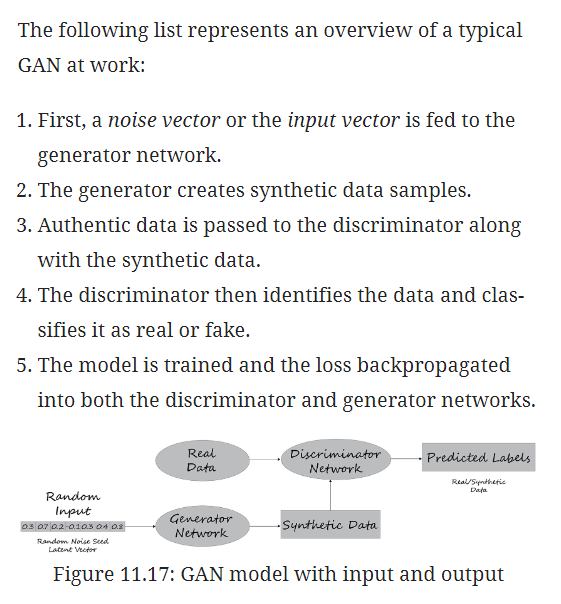 <br>

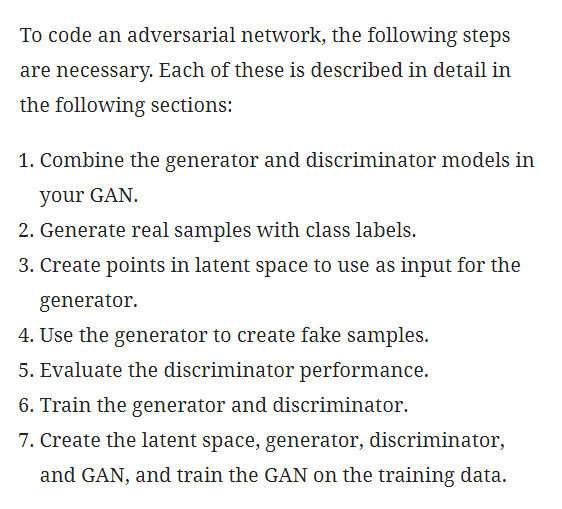 <br>

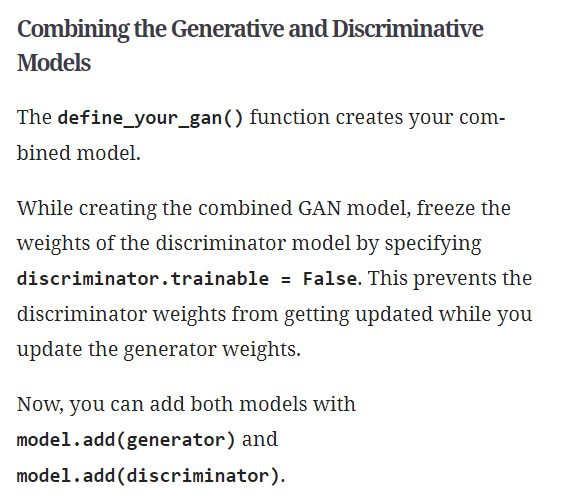

Create a function to define GANs by combining **the Generator** and **the Discriminator** model:

In [ ]:
# function to form Generative Adversarial Networks(GANs)
def define_your_gan(generator, discriminator):

    # set the discriminator to be not trainable
    discriminator.trainable = False

    # create a model with a sequential structure
    model = Sequential()

    # add the generator model to the sequential model
    model.add(generator)

    # add the discriminator model to the sequential model
    model.add(discriminator)

    # compile the model with binary crossentropy loss function and adam optimizer
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam'
                  )

    # return the created model
    return model

-----

-----

### **Generating Sequences with GANs where you will use GAN to create a model to generate a Quadratic function(y = x^2) for the values of x b/w (-0.5, 0.5)**

*1. Import required libraries*

In [ ]:
# import the Sequential class from the keras.models module
from tensorflow.keras.models import Sequential

# import the hstack, zeros and ones functions from the numpy module
from numpy import hstack, zeros, ones

# import the rand and randn functions from the numpy.random module
from numpy.random import rand, randn

# import the Dense class from the keras.layers module
from tensorflow.keras.layers import Dense

# import the pyplot module from matplotlib and give it an alias plt
import matplotlib.pyplot as plt

*2. Define the Generator Model as below:*

In [ ]:
# function to define Generator model
def define_gen(latent_dim, n_outputs=2):

  # create a Sequential model
  model = Sequential()

  # add Dense layer with 15 units, relu activation, he_uniform kernel initializer
  # and input dimension equal to laten_dim
  model.add(Dense(15, activation="relu", kernel_initializer="he_uniform", input_dim=latent_dim))

  # add output Dense layer with n_outputs units and "linear" activation function
  model.add(Dense(n_outputs, activation="linear"))

  # return the model
  return model

*3. Define the Discriminator Model as below:*

In [ ]:
# function to define discriminator model
def define_disc(n_inputs=2):

  # create a Sequential model
  model = Sequential()

  # add Dense layer with 25 units, relu activation, he_uniform kernel initializer and input dim
  model.add(Dense(25, activation="relu", kernel_initializer="he_uniform", input_dim=n_inputs))

  # add Dense output layer to classify where it's fake or real
  model.add(Dense(1, activation="sigmoid"))

  # compile the model with binary-crossentropy loss function, adam optimizer and accuracy metrics
  model.compile(
      optimizer = "adam",
      loss = "binary_crossentropy",
      metrics = ["accuracy"]
                )
  
  # return the model
  return model


*4. Form GANs model by combining the Generator and Discriminator models:*

In [ ]:
# function to combine the Generator and Discriminator models
def define__gan(generator, discriminator):

  # set the discriminator to be not trainable
  discriminator.trainable = False

  # create a Sequential model
  model = Sequential()

  # add the Generator model to the Sequential model
  model.add(generator)

  # add the Discriminator model to the Sequential model
  model.add(discriminator)

  # compile the model with binary-crossentropy loss function & Adam optimizer
  model.compile(
      optimizer = "adam",
      loss = "binary_crossentropy"
                )
  
  # return the model
  return model

*5. Extract real samples from your dataset to inspect fake samples again them:*

In [ ]:
# function to extract real samples
def generate_real(n):

    # generate n random numbers in the range [-0.5, 0.5]
    X1 = rand(n) - 0.5

    # square the random numbers to create a parabolic relationship
    X2 = X1 * X1

    # reshape the arrays to have shape (n, 1)
    X1 = X1.reshape(n, 1)
    X2 = X2.reshape(n, 1)

    # stack the arrays horizontally to create a dataset with two features
    X = hstack((X1, X2))

    # create an array of ones to represent the class label for real samples
    y = ones((n, 1))
    
    # return the generated dataset and class labels
    return X, y

*Set the Generator model to create fake samples:*

In [ ]:
# function to generate an array of random numbers with a normal distribution
def gen_latent_points(latent_dim, n):

  # generate 1D array of n * latent_dim values from a standard normal distribution
  x_input = randn(latent_dim * n)

  # reshape the 1D array into a 2D array with n rows and latent_dim columns
  x_input = x_input.reshape(n, latent_dim)

  return x_input

In [ ]:
# Use the generator to generate fake samples with class labels
def gen_fake(generator, latent_dim, n):

    # generate latent points as input for the generator
    x_input = gen_latent_points(latent_dim, n)

    # use the generator to generate fake samples
    X = generator.predict(x_input)

    # create an array of zeros to represent the class label for fake samples
    y = zeros((n, 1))
    
    # return the generated dataset and class labels
    return X, y

*6. Evaluate the discriminator model by plotting both real and fake data points*

In [ ]:
# function to plot real and fake data points
def performance_summary(epoch, generator, discriminator, latent_dim, n = 100):

  # generate n real samples with class labels
  x_real, y_real = generate_real(n)

  # evaluate the discriminator on the real samples
  _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)

  # generate n fake samples with class labels
  x_fake, y_fake = gen_fake(generator, latent_dim, n)

  # evaluate the discriminator on the fake samples
  _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)

  # display the epoch  number and the accuracy of the discriminator on real & fake samples
  print(epoch, acc_real, acc_fake)

  # create a scatter plot of the real and fake samples
  plt.scatter(x_real[:, 0], x_real[:, 1], color="black")
  plt.scatter(x_fake[:, 0], x_fake[:, 1], color="red")
  plt.show()

*7. Create a function to train the Model:*

In [ ]:
# function to train the Model
def train(g_model, d_model, gan_model, latent_dim, n_epochs=1000, n_batches=128, n_eval=100):

  # calculate half of the batch size
  half_batch = int(n_batches / 2)

  # loop over the number of epochs
  for i in range(n_epochs):

    # generate half_batch real samples with class labels
    x_real, y_real = generate_real(half_batch)

    # generate half_batch fake samples with class labels
    x_fake, y_fake = gen_fake(g_model, latent_dim, half_batch)

    # update the discriminator model weights on real samples
    d_model.train_on_batch(x_real, y_real)

    # update the discriminator model weights on fake samples
    d_model.train_on_batch(x_fake, y_fake)

    # generate n_batch latent points
    x_gan = gen_latent_points(latent_dim, n_batches)

    # create a column vector of n_batch ones
    y_gan = ones((n_batches, 1))

    # update the generator via the discriminator's error
    gan_model.train_on_batch(x_gan, y_gan)

    # evaluate the model performance every n_eval epochs
    if (i + 1) % n_eval == 0:
      performance_summary(i, g_model, d_model, latent_dim)

Finally,

* Create a parameter for the latent dimension and set it equal to 5
* Then, create a generator, discriminator, and GAN using the respective functions 
* Train the generator, discriminator, and GAN models using the train function

4/4 [==============================] - 0s 2ms/step
99 0.28999999165534973 0.9399999976158142


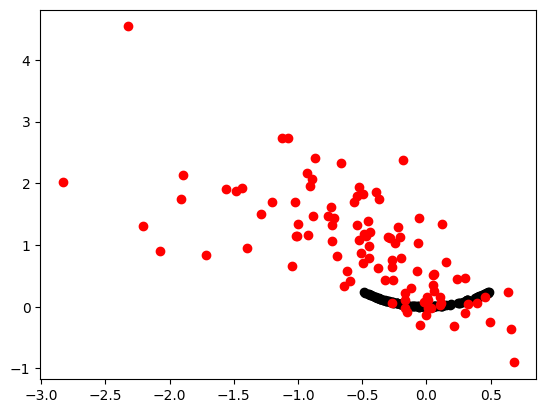

4/4 [==============================] - 0s 3ms/step
199 0.699999988079071 0.6800000071525574


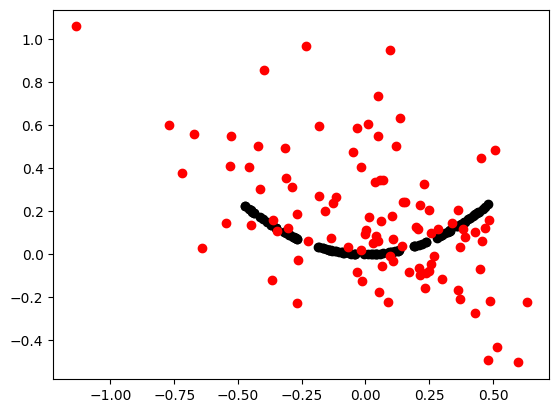

4/4 [==============================] - 0s 3ms/step
299 0.6700000166893005 0.550000011920929


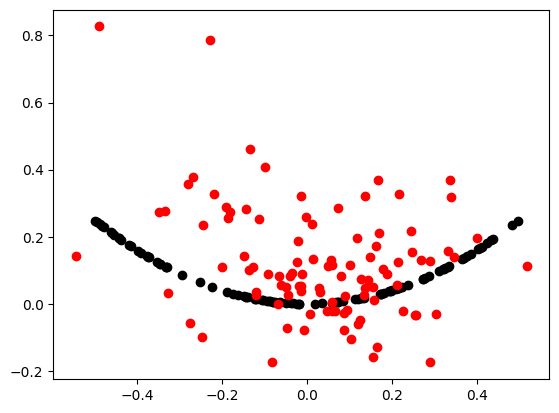

4/4 [==============================] - 0s 2ms/step
399 0.8199999928474426 0.49000000953674316


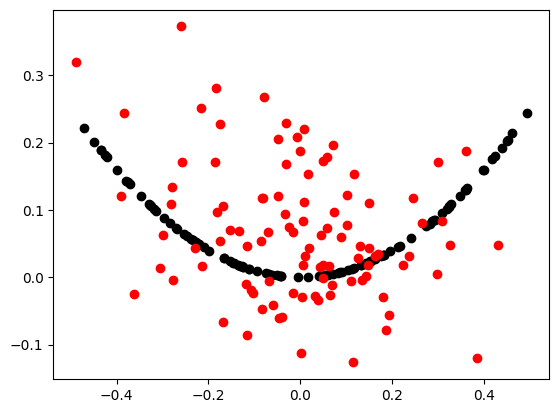

4/4 [==============================] - 0s 3ms/step
499 0.9300000071525574 0.3100000023841858


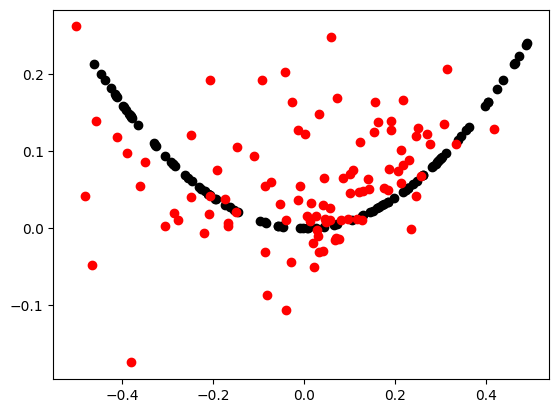

4/4 [==============================] - 0s 4ms/step
599 0.9399999976158142 0.25


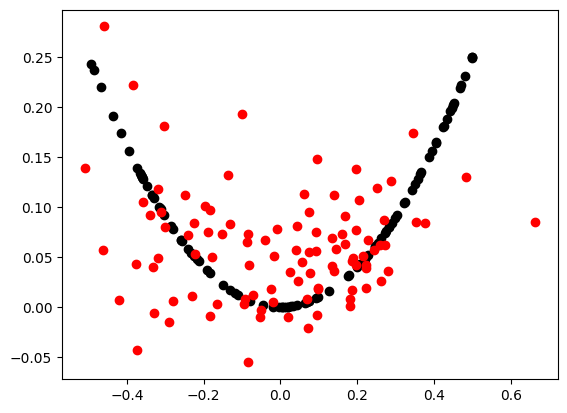

4/4 [==============================] - 0s 2ms/step
699 1.0 0.2800000011920929


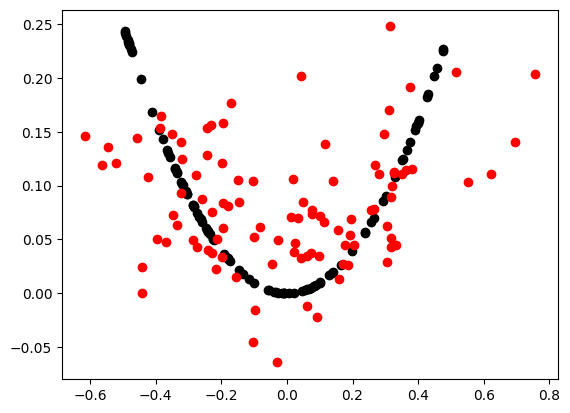

4/4 [==============================] - 0s 3ms/step
799 1.0 0.30000001192092896


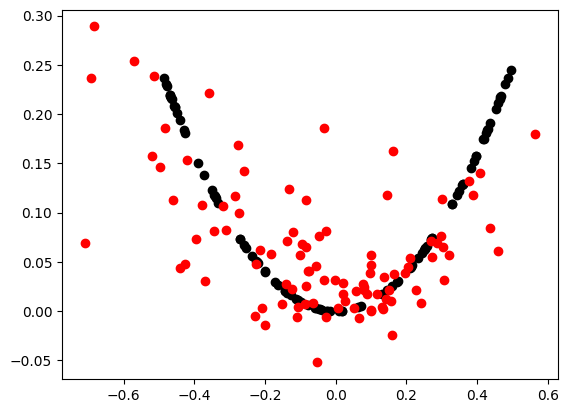

4/4 [==============================] - 0s 3ms/step
899 1.0 0.23999999463558197


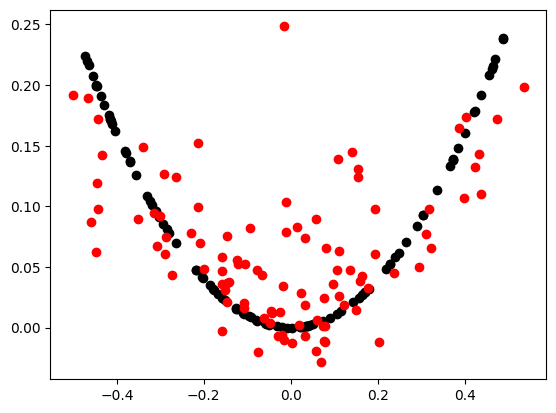

4/4 [==============================] - 0s 3ms/step
999 1.0 0.47999998927116394


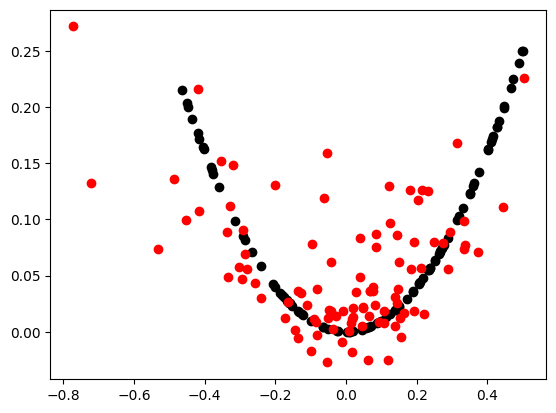

In [ ]:
# set the size of the latent space
latent_dim = 5

# define the generator model
generator = define_gen(latent_dim)

# define the discriminator model
discriminator = define_disc()

# define the GAN model by combining the generator and discriminator models
gan_model = define_gan(generator, discriminator)

# train the GAN model
train(generator, discriminator, gan_model, latent_dim)

* The output shows the generator progressively improving by generating points that more closely resemble a quadratic function. 

* In early epochs, the points generated by the generator, indicated by the black dots, show little similarity to the true quadratic function, indicated by the red dots. 

* However, by the final epoch, the points generated by the generator almost lie on top of the true points, demonstrating that the generator has almost captured the true underlying function – the quadratic.

-------

-------

# <center>**Deep Convolutional Generative Adversarial Networks(DCGANs)**</center>

-->**DCGANs = Generator + Discriminator** uses **Convolutional neural networks** to generate higher-quality images

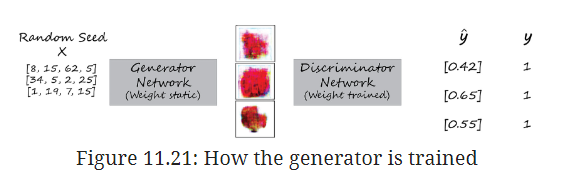

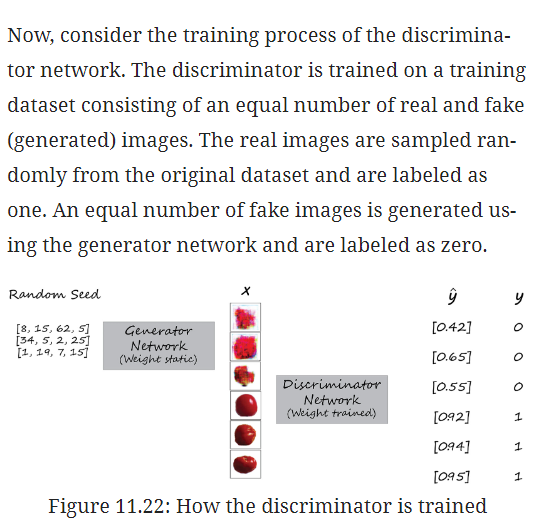

#### ***Function to define Generator Convolutional Model***

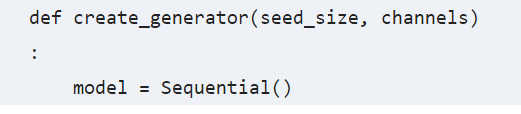

In [ ]:
def create_generator(seed_size, channels):
    """
    This function creates a generator model using the Keras Sequential API.
    :param seed_size: The size of the random noise vector used as input to the generator.
    :param channels: The number of channels in the output image.
    :return: The generator model.
    """
    model = Sequential()

    # Start with a dense layer that takes the seed as input
    model.add(Dense(4 * 4 * 256, activation="relu", input_dim=seed_size))
    
    # Reshape the output into a 4x4x256 tensor
    model.add(Reshape((4, 4, 256)))
    
    # Upsample to 8x8
    model.add(UpSampling2D())
    
    # Add a convolutional layer
    model.add(Conv2D(256, kernel_size=3, padding="same"))
    
    # Normalize the activations
    model.add(BatchNormalization(momentum=0.8))
    
    # Apply ReLU activation
    model.add(Activation("relu"))

    # Upsample to 16x16
    model.add(UpSampling2D())
    
    # Add another convolutional layer
    model.add(Conv2D(256, kernel_size=3, padding="same"))
    
    # Normalize the activations
    model.add(BatchNormalization(momentum=0.8))
    
    # Apply ReLU activation
    model.add(Activation("relu"))

    # Upsample to 32x32
    model.add(UpSampling2D())
    
    # Add another convolutional layer
    model.add(Conv2D(128, kernel_size=3, padding="same"))
    
    # Normalize the activations
    model.add(BatchNormalization(momentum=0.8))
    
    # Apply ReLU activation
    model.add(Activation("relu"))

    if gen_res > 1:
        # Upsample by a factor of gen_res if specified
        model.add(UpSampling2D(size=(gen_res, gen_res)))
        
        # Add another convolutional layer
        model.add(Conv2D(128, kernel_size=3, padding="same"))
        
        # Normalize the activations
        model.add(BatchNormalization(momentum=0.8))
        
        # Apply ReLU activation
        model.add(Activation("relu"))

    # Final convolutional layer to produce the output image
    model.add(Conv2D(channels, kernel_size=3, padding="same"))
    
    # Apply tanh activation to scale pixel values between -1 and 1
    model.add(Activation("tanh"))

    return model

### ***Write a function to define the Discriminator Convolutional Model***

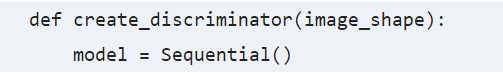

In [ ]:
def create_discriminator(image_shape):
    """
    This function creates a discriminator model using the Keras Sequential API.
    :param image_shape: The shape of the input image.
    :return: The discriminator model.
    """
    model = Sequential()

    # Start with a convolutional layer that takes the image as input
    model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=image_shape, padding="same"))
    
    # Apply leaky ReLU activation
    model.add(LeakyReLU(alpha=0.2))
    
    # Add dropout to prevent overfitting
    model.add(Dropout(0.25))

    # Add another convolutional layer
    model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
    
    # Add zero padding to preserve spatial dimensions
    model.add(ZeroPadding2D(padding=((0, 1), (0, 1))))
    
    # Normalize the activations
    model.add(BatchNormalization(momentum=0.8))
    
    # Apply leaky ReLU activation
    model.add(LeakyReLU(alpha=0.2))
    
    # Add dropout to prevent overfitting
    model.add(Dropout(0.25))

    # Add another convolutional layer
    model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
    
    # Normalize the activations
    model.add(BatchNormalization(momentum=0.8))
    
    # Apply leaky ReLU activation
    model.add(LeakyReLU(alpha=0.2))
    
    # Add dropout to prevent overfitting
    model.add(Dropout(0.25))

    # Add another convolutional layer
    model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
    
    # Normalize the activations
    model.add(BatchNormalization(momentum=0.8))
    
    # Apply leaky ReLU activation
    model.add(LeakyReLU(alpha=0.2))
    
    # Add dropout to prevent overfitting
    model.add(Dropout(0.25))

    # Add another convolutional layer
    model.add(Conv2D(512, kernel_size=3, strides=1, padding="same"))
    
    # Normalize the activations
    model.add(BatchNormalization(momentum=0.8))
    
    # Apply leaky ReLU activation
    model.add(LeakyReLU(alpha=0.2))
    
    # Add dropout to prevent overfitting
    model.add(Dropout(0.25))

    # Flatten the output of the last convolutional layer
    model.add(Flatten())
    
    # Final dense layer to produce a binary classification
    model.add(Dense(1, activation='sigmoid'))

    return model

### **Generating new Images with DCGANs by training the Model on tomato dataset**

*1. Load Google Colab and Google Drive*

In [ ]:
try:
    # Try to import the Google Colab drive module
    from google.colab import drive
    
    # Mount the Google Drive at the specified path
    drive.mount('/content/drive', force_remount=True)
    
    # Set a flag to indicate that we are running on Google Colab
    COLAB = True
    
    # Print a message to indicate that we are using Google Colab
    print("Note: using Google CoLab")
    
    # Set the TensorFlow version to 2.x
    %tensorflow_version 2.x
except:
    # If the above code fails, we are not running on Google Colab
    print("Note: not using Google CoLab")
    
    # Set the COLAB flag to False
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


*2. Import relevant libraries*

In [ ]:
# Import TensorFlow
import tensorflow as tf

# Import various layers from TensorFlow Keras
from tensorflow.keras.layers import Input, Reshape, Dropout, Dense
from tensorflow.keras.layers import Flatten, BatchNormalization
from tensorflow.keras.layers import Activation, ZeroPadding2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import UpSampling2D, Conv2D

# Import model-related functionality from TensorFlow Keras
from tensorflow.keras.models import Sequential, Model, load_model

# Import the Adam optimizer from TensorFlow Keras
from tensorflow.keras.optimizers import Adam

# Import the zipfile module to work with zip files
import zipfile

# Import NumPy for numerical computing
import numpy as np

# Import the Image module from the Python Imaging Library (PIL)
from PIL import Image

# Import tqdm for progress bars
from tqdm import tqdm

# Import the os module to interact with the operating system
import os

# Import the time module to work with time-related functionality
import time

# Import Matplotlib for plotting
import matplotlib.pyplot as plt

# Import the imread function from scikit-image to read image files
from skimage.io import imread

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Format a time string to track your time usage:

In [ ]:
def time_string(sec_elapsed):
    """
    This function converts a time duration in seconds to a formatted string.
    :param sec_elapsed: The time duration in seconds.
    :return: A formatted string representing the time duration.
    """
    # Calculate the number of hours
    hour = int(sec_elapsed / (60 * 60))
    
    # Calculate the number of minutes
    minute = int((sec_elapsed % (60 * 60)) / 60)
    
    # Calculate the number of seconds
    second = sec_elapsed % 60

    # Return the formatted string
    return "{}:{:>02}:{:>05.2f}".format(hour, minute, second)

*3. Setting vaious parameters and configuration options for a Generative adversarial networks(GANs).*

In [ ]:
# Set the resolution factor for generated images
gen_res = 3

# Calculate the size of the generated images
gen_square = 32 * gen_res

# Set the number of channels in the generated images
img_chan = 3

# Set the number of rows in the preview grid
img_rows = 5

# Set the number of columns in the preview grid
img_cols = 5

# Set the margin size for the preview grid
img_margin = 16

# Set the size of the random noise vector used as input to the generator
seed_vector = 200

# Set the path to the training data
data_path = '/content/drive/MyDrive/Datasets/apple-or-tomato/training_set/'

# Set the number of training epochs
epochs = 5000

# Set the batch size for training
num_batch = 32

# Set the buffer size for shuffling the training data
num_buffer = 60000

# Print information about the configuration
print(f"Will generate a resolution of {gen_res}.")
print(f"Will generate {gen_square}px square images.")
print(f"Will generate {img_chan} image channels.")
print(f"Will generate {img_rows} preview rows.")
print(f"Will generate {img_cols} preview columns.")
print(f"Our preview margin equals {img_margin}.")
print(f"Our data path is: {data_path}.")
print(f"Our number of epochs are: {epochs}.")
print(f"Will generate a batch size of {num_batch}.")
print(f"Will generate a buffer size of {num_buffer}.")

Will generate a resolution of 3.
Will generate 96px square images.
Will generate 3 image channels.
Will generate 5 preview rows.
Will generate 5 preview columns.
Our preview margin equals 16.
Our data path is: /content/drive/MyDrive/Datasets/apple-or-tomato/training_set/.
Our number of epochs are: 5000.
Will generate a batch size of 32.
Will generate a buffer size of 60000.


*4. Load and Proprocess the Images. Save it as NumPy preprocessed file.*

In [ ]:
"""
# unzip the loaded ZIP file in the drive(if necessary)
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/Datasets/apple-or-tomato.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Datasets')
"""

"\n# unzip the loaded ZIP file in the drive(if necessary)\nimport zipfile\n\nwith zipfile.ZipFile('/content/drive/MyDrive/Datasets/apple-or-tomato.zip', 'r') as zip_ref:\n    zip_ref.extractall('/content/drive/MyDrive/Datasets')\n"

In [ ]:
# Set the path to the preprocessed training data
training_binary_path = os.path.join(data_path, f'training_data_{gen_square}_{gen_square}.npy')

# Print the path to the preprocessed training data
print(f"Looking for file: {training_binary_path}")

# Check if the preprocessed training data exists
if not os.path.isfile(training_binary_path):
    # If the preprocessed training data does not exist, create it
    start = time.time()
    
    # Print a message to indicate that we are loading the training images
    print("Loading training images...")

    # Initialize an empty list to store the training data
    train_data = []

    # Set the path to the directory containing the training images
    images_path = os.path.join(data_path, 'tomato')

    # Loop over all files in the directory containing the training images
    for filename in tqdm(os.listdir(images_path)):
        # Construct the full path to the current image file
        path = os.path.join(images_path, filename)
        
        # Open the image file and resize it to the desired size
        image = Image.open(path).resize((gen_square, gen_square), Image.ANTIALIAS)
        
        # Convert the image to a NumPy array and add it to the list of training data
        train_data.append(np.asarray(image))

    # Convert the list of training data to a NumPy array
    train_data = np.reshape(train_data, (-1, gen_square, gen_square, img_chan))
    
    # Convert the data type of the training data to float32
    train_data = train_data.astype(np.float32)
    
    # Normalize the pixel values of the training data to be between -1 and 1
    train_data = train_data / 127.5 - 1.

    # Print a message to indicate that we are saving the preprocessed training data
    print("Saving training images...")
    
    # Save the preprocessed training data to disk
    np.save(training_binary_path, train_data)

    # Calculate and print the time it took to preprocess the training data
    elapsed = time.time() - start
    print(f'Image preprocessing time: {time_string(elapsed)}')
else:
    # If the preprocessed training data already exists, load it from disk
    print("Loading the training data...")
    train_data = np.load(training_binary_path)

Looking for file: /content/drive/MyDrive/Datasets/apple-or-tomato/training_set/training_data_96_96.npy
Loading the training data...


*5. Batch and Shuffle the data*

In [ ]:
# create batches and shuffle the dataset
train_dataset = tf.data.Dataset.from_tensor_slices(train_data).shuffle(num_buffer).batch(num_batch)
train_dataset

<_BatchDataset element_spec=TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32, name=None)>

*Build the Generator Convolutional Model to generate Images:*

In [ ]:
def create_generator(seed_size, channels):
    """
    This function creates a generator model using the Keras Sequential API.
    :param seed_size: The size of the random noise vector used as input to the generator.
    :param channels: The number of channels in the output image.
    :return: The generator model.
    """
    model = Sequential()

    # Start with a dense layer that takes the seed as input
    model.add(Dense(4 * 4 * 256, activation="relu", input_dim=seed_size))
    
    # Reshape the output into a 4x4x256 tensor
    model.add(Reshape((4, 4, 256)))
    
    # Upsample to 8x8
    model.add(UpSampling2D())
    
    # Add a convolutional layer
    model.add(Conv2D(256, kernel_size=3, padding="same"))
    
    # Normalize the activations
    model.add(BatchNormalization(momentum=0.8))
    
    # Apply ReLU activation
    model.add(Activation("relu"))

    # Upsample to 16x16
    model.add(UpSampling2D())
    
    # Add another convolutional layer
    model.add(Conv2D(256, kernel_size=3, padding="same"))
    
    # Normalize the activations
    model.add(BatchNormalization(momentum=0.8))
    
    # Apply ReLU activation
    model.add(Activation("relu"))

    # Upsample to 32x32
    model.add(UpSampling2D())
    
    # Add another convolutional layer
    model.add(Conv2D(128, kernel_size=3, padding="same"))
    
    # Normalize the activations
    model.add(BatchNormalization(momentum=0.8))
    
    # Apply ReLU activation
    model.add(Activation("relu"))

    if gen_res > 1:
        # Upsample by a factor of gen_res if specified
        model.add(UpSampling2D(size=(gen_res, gen_res)))
        
        # Add another convolutional layer
        model.add(Conv2D(128, kernel_size=3, padding="same"))
        
        # Normalize the activations
        model.add(BatchNormalization(momentum=0.8))
        
        # Apply ReLU activation
        model.add(Activation("relu"))

    # Final convolutional layer to produce the output image
    model.add(Conv2D(channels, kernel_size=3, padding="same"))
    
    # Apply tanh activation to scale pixel values between -1 and 1
    model.add(Activation("tanh"))

    return model

*6. Build the Discriminator Convolutional Model to classify Images as fake or real:*

In [ ]:
def create_discriminator(image_shape):
    """
    This function creates a discriminator model using the Keras Sequential API.
    :param image_shape: The shape of the input image.
    :return: The discriminator model.
    """
    model = Sequential()

    # Start with a convolutional layer that takes the image as input
    model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=image_shape, padding="same"))
    
    # Apply leaky ReLU activation
    model.add(LeakyReLU(alpha=0.2))
    
    # Add dropout to prevent overfitting
    model.add(Dropout(0.25))

    # Add another convolutional layer
    model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
    
    # Add zero padding to preserve spatial dimensions
    model.add(ZeroPadding2D(padding=((0, 1), (0, 1))))
    
    # Normalize the activations
    model.add(BatchNormalization(momentum=0.8))
    
    # Apply leaky ReLU activation
    model.add(LeakyReLU(alpha=0.2))
    
    # Add dropout to prevent overfitting
    model.add(Dropout(0.25))

    # Add another convolutional layer
    model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
    
    # Normalize the activations
    model.add(BatchNormalization(momentum=0.8))
    
    # Apply leaky ReLU activation
    model.add(LeakyReLU(alpha=0.2))
    
    # Add dropout to prevent overfitting
    model.add(Dropout(0.25))

    # Add another convolutional layer
    model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
    
    # Normalize the activations
    model.add(BatchNormalization(momentum=0.8))
    
    # Apply leaky ReLU activation
    model.add(LeakyReLU(alpha=0.2))
    
    # Add dropout to prevent overfitting
    model.add(Dropout(0.25))

    # Add another convolutional layer
    model.add(Conv2D(512, kernel_size=3, strides=1, padding="same"))
    
    # Normalize the activations
    model.add(BatchNormalization(momentum=0.8))
    
    # Apply leaky ReLU activation
    model.add(LeakyReLU(alpha=0.2))
    
    # Add dropout to prevent overfitting
    model.add(Dropout(0.25))

    # Flatten the output of the last convolutional layer
    model.add(Flatten())
    
    # Final dense layer to produce a single output value
    model.add(Dense(1, activation='sigmoid'))

    return model

*7. During the training process, display generated images to get some insight into the progress that's been made. Save the images. At regular intervals of 100 epochs, save a grid of images to evaluate the progress:*

In [ ]:
def save_images(cnt, noise):
    """
    This function generates and saves a grid of images produced by the generator model.
    :param cnt: The current training iteration.
    :param noise: A batch of random noise vectors used as input to the generator.
    """
    # Create an empty image array to hold the generated images
    img_array = np.full((img_margin + (img_rows * (gen_square + img_margin)), img_margin + (img_cols * (gen_square + img_margin)), 3), 255, dtype=np.uint8)

    # Generate a batch of images using the generator model
    gen_imgs = generator.predict(noise)
    
    # Rescale pixel values from [-1, 1] to [0, 1]
    gen_imgs = 0.5 * gen_imgs + 0.5

    # Initialize a counter to keep track of the current image
    img_count = 0

    # Loop over all rows in the preview grid
    for row in range(img_rows):
        # Loop over all columns in the preview grid
        for col in range(img_cols):
            # Calculate the position of the current image in the preview grid
            r = row * (gen_square + 16) + img_margin
            c = col * (gen_square + 16) + img_margin
            
            # Insert the current generated image into the preview grid
            img_array[r:r+gen_square, c:c+gen_square] = gen_imgs[img_count] * 255
            
            # Increment the image counter
            img_count += 1

    # Set the path to the output directory
    output_path = os.path.join(data_path, 'output')
    
    # Create the output directory if it does not exist
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # Set the path to the output image file
    filename = os.path.join(output_path, f"train-{cnt}.png")
    
    # Create an image from the preview grid and save it to disk
    im = Image.fromarray(img_array)
    im.save(filename)

*8. Create a Generator that generates noise:*

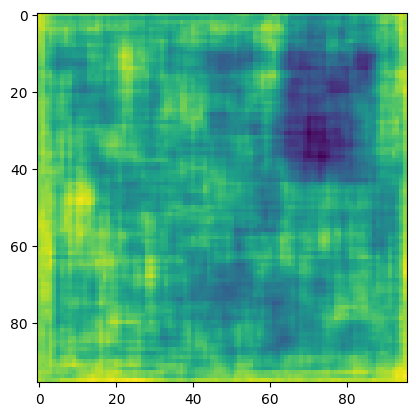

In [ ]:
# Create a generator model
generator = create_generator(seed_vector, img_chan)

# Generate a random noise vector
noise = tf.random.normal([1, seed_vector])

# Use the generator model to generate an image from the noise vector
gen_img = generator(noise, training=False)

# Display the generated image using Matplotlib
plt.imshow(gen_img[0, :, :, 0])

View one of the images generated by the Generator i.e, examined by Discriminator model:

In [ ]:
# Set the shape of the input images
img_shape = (gen_square, gen_square, img_chan)

# Create a discriminator model
discriminator = create_discriminator(img_shape)

# Use the discriminator model to classify the generated image as real or fake
decision = discriminator(gen_img)

# Print the output of the discriminator model
print(decision)

tf.Tensor([[0.5021552]], shape=(1, 1), dtype=float32)


*9. Create a Loss Function. Since the outputs of the Discriminator and Generator Model are different, you need to define two seperate loss functions for them. Moreover, they need to be trained separately in independent passes through the networks:*

In [ ]:
# Create a binary cross-entropy loss function
cross_entropy = tf.keras.losses.BinaryCrossentropy()

def discrim_loss(real_output, fake_output):
    """
    This function calculates the loss for the discriminator model.
    :param real_output: The output of the discriminator model for a batch of real images.
    :param fake_output: The output of the discriminator model for a batch of fake images.
    :return: The total loss for the discriminator model.
    """
    # Calculate the loss for the real images
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    
    # Calculate the loss for the fake images
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    
    # Calculate the total loss as the sum of the real and fake losses
    total_loss = real_loss + fake_loss

    return total_loss

def gen_loss(fake_output):
    """
    This function calculates the loss for the generator model.
    :param fake_output: The output of the discriminator model for a batch of fake images generated by the generator model.
    :return: The loss for the generator model.
    """
    # Calculate the loss as if all fake images were classified as real
    return cross_entropy(tf.ones_like(fake_output), fake_output)

*10. Create a 2 Adam optimizers(one for generator and one for the discriminator) using same learning rate & momentum.*

In [ ]:
# Create an Adam optimizer for the generator model
gen_optimizer = tf.keras.optimizers.Adam(1.5e-4, 0.5)

# Create an Adam optimizer for the discriminator model
disc_optimizer = tf.keras.optimizers.Adam(1.5e-4, 0.5)

*11. Create a function to implement an individual training step. **With tf.GradientTape()** train the discriminator and generator at the same time, but separatelly from one another:*

In [ ]:
@tf.function
def train_step(images):
    """
    This function performs a single training step for the generator and discriminator models.
    :param images: A batch of real images.
    :return: The loss for the generator and discriminator models.
    """
    # Generate a batch of random noise vectors
    seed = tf.random.normal([num_batch, seed_vector])

    # Record the operations performed by the generator and discriminator models
    # so that we can calculate their gradients later
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      
        # Generate a batch of fake images using the generator model
        gen_imgs = generator(seed, training=True)
        
        # Classify the real images using the discriminator model
        real_output = discriminator(images, training=True)
        
        # Classify the fake images using the discriminator model
        fake_output = discriminator(gen_imgs, training=True)

        # Calculate the loss for the generator model
        g_loss = gen_loss(fake_output)
        
        # Calculate the loss for the discriminator model
        d_loss = discrim_loss(real_output, fake_output)

    # Calculate the gradients of the loss with respect to the generator's weights
    gradients_of_generator = gen_tape.gradient(g_loss, generator.trainable_variables)
    
    # Calculate the gradients of the loss with respect to the discriminator's weights
    gradients_of_discriminator = disc_tape.gradient(d_loss, discriminator.trainable_variables)

    # Update the weights of the generator model using its optimizer
    gen_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    
    # Update the weights of the discriminator model using its optimizer
    disc_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return g_loss, d_loss

*12. Create a function to train the Generator and Discriminator Models for a specified number of epochs:*

In [ ]:
def train(dataset, epochs):
    """
    This function trains the generator and discriminator models for a specified number of epochs.
    :param dataset: The training dataset.
    :param epochs: The number of training epochs.
    """
    # Generate a fixed batch of random noise vectors to use for generating preview images
    fixed_seed = np.random.normal(0, 1, (img_rows * img_cols, seed_vector))

    # Record the start time of training
    start = time.time()

    # Loop over all training epochs
    for epoch in range(epochs):

        # Record the start time of the current epoch
        epoch_start = time.time()
        
        # Initialize lists to store the loss for each batch
        g_loss_list = []
        d_loss_list = []

        # Loop over all batches in the training dataset
        for image_batch in dataset:
          
            # Perform a single training step and record the loss
            t = train_step(image_batch)
            g_loss_list.append(t[0])
            d_loss_list.append(t[1])

        # Calculate the average loss for the generator and discriminator models
        generator_loss = sum(g_loss_list) / len(g_loss_list)
        discriminator_loss = sum(d_loss_list) / len(d_loss_list)

        # Calculate and print the time it took to complete the current epoch
        epoch_elapsed = time.time() - epoch_start
        print(f'Epoch {epoch+1}, gen loss={generator_loss}, disc loss={discriminator_loss}, {time_string(epoch_elapsed)}')

        # Save a preview image for the current epoch
        save_images(epoch, fixed_seed)

    # Calculate and print the total training time
    elapsed = time.time() - start
    print(f'Training time: {time_string(elapsed)}')

*13. Train the DCGANs Model on training dataset:*

In [ ]:
train(train_dataset, epochs)

Epoch 1, gen loss=3.0724990367889404, disc loss=0.33973509073257446, 0:00:13.44
1/1 [==============================] - 1s 1s/step
Epoch 2, gen loss=3.351658582687378, disc loss=0.6065307855606079, 0:00:02.91
1/1 [==============================] - 0s 32ms/step
Epoch 3, gen loss=3.28306245803833, disc loss=0.7656347155570984, 0:00:02.90
1/1 [==============================] - 0s 18ms/step
Epoch 4, gen loss=2.5722813606262207, disc loss=0.9190275073051453, 0:00:02.95
1/1 [==============================] - 0s 19ms/step
Epoch 5, gen loss=2.1977925300598145, disc loss=1.1214778423309326, 0:00:02.96
1/1 [==============================] - 0s 18ms/step
Epoch 6, gen loss=2.057753086090088, disc loss=1.2477468252182007, 0:00:02.93
1/1 [==============================] - 0s 29ms/step
Epoch 7, gen loss=1.9564549922943115, disc loss=1.200039029121399, 0:00:02.89
1/1 [==============================] - 0s 18ms/step
Epoch 8, gen loss=2.2277326583862305, disc loss=1.2305290699005127, 0:00:02.84
1/1 [=====

KeyboardInterrupt: ignored

*14. Take a look at the generated images on different stages:*

Generated Images at training stage: 0 epochs


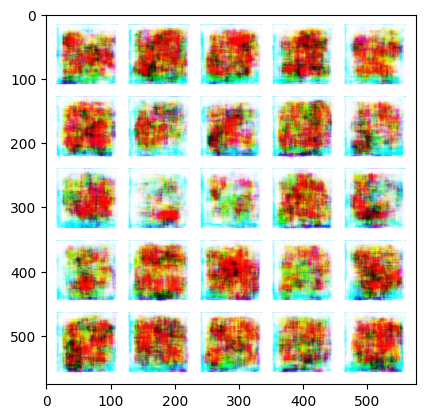

In [ ]:
# Set the path to the image file
image_path = '/content/drive/MyDrive/Datasets/apple-or-tomato/training_set/output/train-0.png'

# Read the image file using scikit-image
a = imread(image_path)

print("Generated Images at training stage: 0 epochs")
# Display the image using Matplotlib
plt.imshow(a)

Generated Images at training stage: 50 epochs


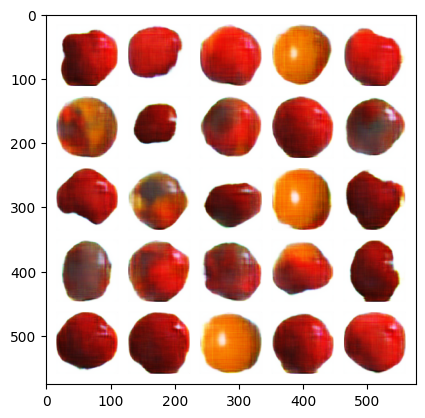

In [ ]:
# Set the path to the image file
image_path = '/content/drive/MyDrive/Datasets/apple-or-tomato/training_set/output/train-50.png'

# Read the image file using scikit-image
a = imread(image_path)

print("Generated Images at training stage: 50 epochs")
# Display the image using Matplotlib
plt.imshow(a)

Generated Images at training stage: 100 epochs


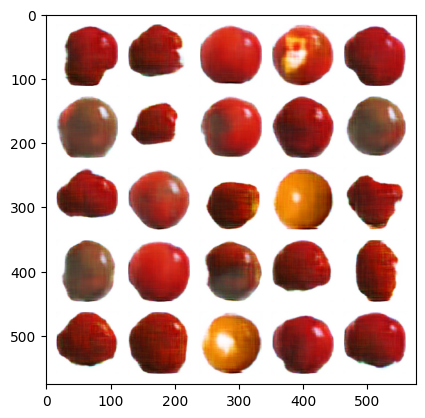

In [ ]:
# Set the path to the image file
image_path = '/content/drive/MyDrive/Datasets/apple-or-tomato/training_set/output/train-100.png'

# Read the image file using scikit-image
a = imread(image_path)

print("Generated Images at training stage: 100 epochs")
# Display the image using Matplotlib
plt.imshow(a)

Generated Images at training stage: 150 epochs


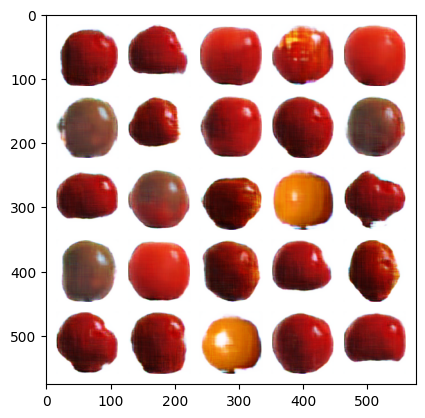

In [ ]:
# Set the path to the image file
image_path = '/content/drive/MyDrive/Datasets/apple-or-tomato/training_set/output/train-150.png'

# Read the image file using scikit-image
a = imread(image_path)

print("Generated Images at training stage: 150 epochs")
# Display the image using Matplotlib
plt.imshow(a)

Generated Images at training stage: 250 epochs


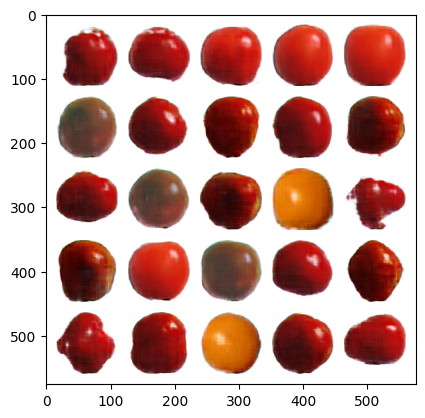

In [ ]:
# Set the path to the image file
image_path = '/content/drive/MyDrive/Datasets/apple-or-tomato/training_set/output/train-250.png'

# Read the image file using scikit-image
a = imread(image_path)

print("Generated Images at training stage: 250 epochs")
# Display the image using Matplotlib
plt.imshow(a)

Generated Images at training stage: 415 epochs


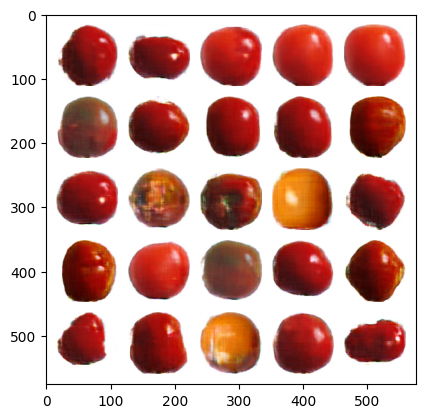

In [ ]:
# Set the path to the image file
image_path = '/content/drive/MyDrive/Datasets/apple-or-tomato/training_set/output/train-415.png'

# Read the image file using scikit-image
a = imread(image_path)

print("Generated Images at training stage: 415 epochs")
# Display the image using Matplotlib
plt.imshow(a)

**The outputs above show that the synthetic tomatoes images generated by Generator look more and more like real tomatoes with increase in number of epochs during training of the DCGANs Model.**

-------

-------

## **Generating a new Bananas Images using GANs Model:**

*1. Download and Load the dataset*

--> Download the specific GitHub Folder in the Google Colab folder directly:

In [1]:
# Import necessary libraries
import requests
from tqdm import tqdm
import os
import zipfile

# Set the URL to download the zip file from
url = 'https://github.com/PacktWorkshops/The-TensorFlow-Workshop/archive/refs/heads/master.zip'
# Set the path to the folder within the zip file
folder_path = 'The-TensorFlow-Workshop-master/Chapter11/Activity11.01/banana-or-orange'
# Set the name for the zip file to be saved as
zip_file_name = 'banana-or_orange.zip'
# Set the name for the folder to be extracted
folder_name = 'banana-or-orange'

# Send a GET request to the URL and stream the response
response = requests.get(url, stream=True)

# Get the total size of the file in bytes
total_size_in_bytes = int(response.headers.get('content-length', 0))
# Set the block size for reading data from the response
block_size = 1024
# Initialize a progress bar to show download progress
progress_bar = tqdm(total=total_size_in_bytes, unit='iB', unit_scale=True)

# Open a file with the specified name in write binary mode
with open(zip_file_name, 'wb') as f:
    # Iterate over the content of the response in blocks of specified size
    for data in response.iter_content(block_size):
        # Update the progress bar with the size of the data read
        progress_bar.update(len(data))
        # Write the data to the file
        f.write(data)

# Close the progress bar
progress_bar.close()

# Open the zip file in read mode
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    # Extract all files from the zip file to a specified directory
    zip_ref.extractall('/content/')
    # Rename a folder within the extracted files to a specified name
    os.rename('/content/' + folder_path, '/content/' + folder_name)

# Remove the zip file after extraction is complete
os.remove(zip_file_name)

1.34GiB [01:39, 13.5MiB/s]


*2. Import required libraries*

In [2]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import InputLayer, Reshape, Dropout, Dense 
from tensorflow.keras.layers import Flatten, BatchNormalization
from tensorflow.keras.layers import UpSampling2D, Conv2D
from tensorflow.keras.layers import Activation, ZeroPadding2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU
import zipfile
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tqdm import tqdm
import os 
import time
from skimage.io import imread

*3. Create a function to format a time string to track your time usage:*

In [3]:
def time_string(sec_elapsed):
    # Convert seconds to hours, minutes and seconds
    hour = int(sec_elapsed / (60 * 60))
    minute = int((sec_elapsed % (60 * 60)) / 60)
    second = sec_elapsed % 60
    
    # Return formatted string
    return "{}:{:>02}:{:>05.2f}".format(hour, minute, second)

*4. Setting different parameters for GANs model:*

In [4]:
# Set the resolution of the generated images
gen_res = 3 

# Calculate the square size of the generated images
gen_square = 32 * gen_res

# Set the number of image channels
img_chan = 3

# Set the number of preview rows
img_rows = 5

# Set the number of preview columns
img_cols = 5

# Set the preview margin size
img_margin = 16

# Set the seed vector size
seed_vector = 200

# Set the data path
data_path = 'banana-or-orange/training_set/'

# Set the number of epochs for training
epochs = 500

# Set the batch size for training
num_batch = 32

# Set the buffer size for training
num_buffer = 60000

# Print out some information about our settings
print(f"Will generate a resolution of {gen_res}.")
print(f"Will generate {gen_square}px square images.")
print(f"Will generate {img_chan} image channels.")
print(f"Will generate {img_rows} preview rows.")
print(f"Will generate {img_cols} preview columns.")
print(f"Our preview margin equals {img_margin}.")
print(f"Our data path is: {data_path}.")
print(f"Our number of epochs are: {epochs}.")
print(f"Will generate a batch size of {num_batch}.")
print(f"Will generate a buffer size of {num_buffer}.")

Will generate a resolution of 3.
Will generate 96px square images.
Will generate 3 image channels.
Will generate 5 preview rows.
Will generate 5 preview columns.
Our preview margin equals 16.
Our data path is: banana-or-orange/training_set/.
Our number of epochs are: 500.
Will generate a batch size of 32.
Will generate a buffer size of 60000.


*5. Load and Preprocess the Dataset to save it as image binary*

In [5]:
# Set the path for the training data binary file
training_binary_path = os.path.join(data_path,
                                    f'training_data_{gen_square}_{gen_square}.npy')

# Print out the path of the training data binary file
print(f"Looking for file: {training_binary_path}")

# Check if the training data binary file exists
if not os.path.isfile(training_binary_path):
    # If the file does not exist, start preprocessing the images
    start = time.time()
    print("Loading training images…")
    train_data = []
    images_path = os.path.join(data_path,'banana')
    
    # Loop through all the images in the specified directory
    for filename in tqdm(os.listdir(images_path)):
        path = os.path.join(images_path,filename)
        images = Image.open(path).resize((gen_square,
                                          gen_square),
                                         Image.ANTIALIAS)
        train_data.append(np.asarray(images))
    
    # Reshape and normalize the training data
    train_data = np.reshape(train_data,(-1,gen_square,
                                        gen_square,img_chan))
    train_data = train_data.astype(np.float32)
    train_data = train_data / 127.5 - 1.
    
    # Save the preprocessed training data to a binary file
    print("Saving training image binary...")
    np.save(training_binary_path,train_data)
    
    # Print out the time it took to preprocess the images
    elapsed = time.time()-start
    print (f'Image preprocess time: {time_string(elapsed)}')
else:
    # If the training data binary file exists, load it
    print("Loading training data...")
    train_data = np.load(training_binary_path)

Looking for file: banana-or-orange/training_set/training_data_96_96.npy
Loading training data...


*6. Batch and Shuffle the Data*

In [6]:
# function to create batches and shuffle the dataset
# Create a TensorFlow dataset from the training data
train_dataset = tf.data.Dataset.from_tensor_slices(train_data) \
                                .shuffle(num_buffer).batch(num_batch)

*7. Build the Generator for the BCGAN:*

In [30]:
def create_dc_generator(seed_size, channels):
    """
    Create a deep convolutional generator model.
    
    :param seed_size: The size of the seed vector
    :param channels: The number of image channels
    :return: The generator model
    """
    model = Sequential()

    # Add the first dense layer
    model.add(Dense(4*4*256, activation="relu", input_dim=seed_size))
    
    # Reshape the output of the dense layer
    model.add(Reshape((4, 4, 256)))
    
    # Add upsampling and convolutional layers
    model.add(UpSampling2D())
    model.add(Conv2D(256, kernel_size=3, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
    
    # Add more upsampling and convolutional layers
    model.add(UpSampling2D())
    model.add(Conv2D(256, kernel_size=3, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
    
    # Output resolution, additional upsampling
    model.add(UpSampling2D())
    model.add(Conv2D(128, kernel_size=3, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
    
    # Add more upsampling layers if needed
    if gen_res > 1:
        model.add(UpSampling2D(size=(gen_res, gen_res)))
        model.add(Conv2D(128, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
    
    # Add the final convolutional layer
    model.add(Conv2D(channels, kernel_size=3, padding="same"))
    
    # Add the final activation layer
    model.add(Activation("tanh"))
    
    return model

*8. Build the Descriminator Model for DCGAN:*

In [31]:
def create_dc_discriminator(image_shape):
    """
    This function creates a discriminator model for a Deep Convolutional Generative Adversarial Network (DCGAN).
    The discriminator takes in an image of shape `image_shape` and outputs a probability of the image being real.
    """
    model = Sequential()

    # Convolutional layer with 32 filters, kernel size of 3, stride of 2 and same padding
    model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=image_shape, padding="same"))
    # LeakyReLU activation with alpha of 0.2
    model.add(LeakyReLU(alpha=0.2))
    # Dropout layer with rate of 0.25
    model.add(Dropout(0.25))

    # Convolutional layer with 64 filters, kernel size of 3, stride of 2 and same padding
    model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
    # ZeroPadding2D layer with padding of ((0,1),(0,1))
    model.add(ZeroPadding2D(padding=((0,1),(0,1))))
    # BatchNormalization layer with momentum of 0.8
    model.add(BatchNormalization(momentum=0.8))
    # LeakyReLU activation with alpha of 0.2
    model.add(LeakyReLU(alpha=0.2))
    # Dropout layer with rate of 0.25
    model.add(Dropout(0.25))

    # Convolutional layer with 128 filters, kernel size of 3, stride of 2 and same padding
    model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
    # BatchNormalization layer with momentum of 0.8
    model.add(BatchNormalization(momentum=0.8))
    # LeakyReLU activation with alpha of 0.2
    model.add(LeakyReLU(alpha=0.2))
    # Dropout layer with rate of 0.25
    model.add(Dropout(0.25))

    # Convolutional layer with 256 filters, kernel size of 3, stride of 1 and same padding
    model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
    # BatchNormalization layer with momentum of 0.8
    model.add(BatchNormalization(momentum=0.8))
    # LeakyReLU activation with alpha of 0.2
    model.add(LeakyReLU(alpha=0.2))
    # Dropout layer with rate of 0.25
    model.add(Dropout(0.25))

    # Convolutional layer with 512 filters, kernel size of 3, stride of 1 and same padding
    model.add(Conv2D(512, kernel_size=3, strides=1, padding="same"))
    # BatchNormalization layer with momentum of 0.8
    model.add(BatchNormalization(momentum=0.8))
    # LeakyReLU activation with alpha of 0.2
    model.add(LeakyReLU(alpha=0.2))
    # Dropout layer with rate of 0.25
    model.add(Dropout(0.25))

    # Flatten the output from the previous layer
    model.add(Flatten())
    
     # Dense (fully connected) layer with one output unit and sigmoid activation function to output a probability.
    model.add(Dense(1, activation='sigmoid'))

    return model

*9. Build the Generator for the vanilla GAN:*

In [32]:
def create_generator(seed_size, channels):
    """
    This function creates a generator model for a Generative Adversarial Network (GAN).
    The generator takes in a random noise vector of size `seed_size` and outputs an image with `channels` color channels.
    """
    model = Sequential()

    # Dense (fully connected) layer with 96*96*3 output units and tanh activation function
    model.add(Dense(96*96*3, activation="tanh", input_dim=seed_size))
    
    # Reshape the output from the previous layer into a 96x96x3 image
    model.add(Reshape((96, 96, 3)))

    return model

*10.Build the Descriminator for the vanilla GAN:*

In [33]:
def create_discriminator(img_size):
    """
    This function creates a discriminator model for a Generative Adversarial Network (GAN).
    The discriminator takes in an image of shape `img_size` and outputs a probability of the image being real.
    """
    model = Sequential()

    # Input layer with shape `img_size`
    model.add(InputLayer(input_shape=img_size))
    
    # Dense (fully connected) layer with 1024 output units and tanh activation function
    model.add(Dense(1024, activation="tanh"))
    
    # Flatten the output from the previous layer
    model.add(Flatten())
    
    # Dense (fully connected) layer with one output unit and sigmoid activation function to output a probability.
    model.add(Dense(1, activation='sigmoid'))

    return model

*9. Create a function to generate and save images that can be used to view progress during the model's training:*

In [34]:
def save_images(generator, cnt, noise, prefix=None):
    """
    This function saves images generated by a `generator` model.
    The `generator` takes in a `noise` vector and generates images.
    The generated images are saved to a file with a name based on the `cnt` 
    and `prefix` parameters.
    
    """
    # Create an array of white pixels with shape determined by `img_margin`, `img_rows`, `img_cols`, and `gen_square`
    img_array = np.full((img_margin + (img_rows * (gen_square+img_margin)), img_margin + (img_cols * (gen_square+img_margin)), 3), 255, dtype=np.uint8)

    # Generate images using the generator model
    gen_imgs = generator.predict(noise)
    
    # Rescale the pixel values of the generated images to be between 0 and 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    img_count = 0
    for row in range(img_rows):
        for col in range(img_cols):
            r = row * (gen_square+16) + img_margin
            c = col * (gen_square+16) + img_margin
            
            # Insert the generated image into the larger image array
            img_array[r:r+gen_square,c:c+gen_square] = gen_imgs[img_count] * 255
            img_count += 1

    # Create the output directory if it does not exist
    output_path = os.path.join(data_path,'output')
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # Save the image array to a file
    filename = os.path.join(output_path,f"train{prefix}-{cnt}.png")
    im = Image.fromarray(img_array)
    im.save(filename)

*10. Initialize the generator for the DCGAN and view the output:*

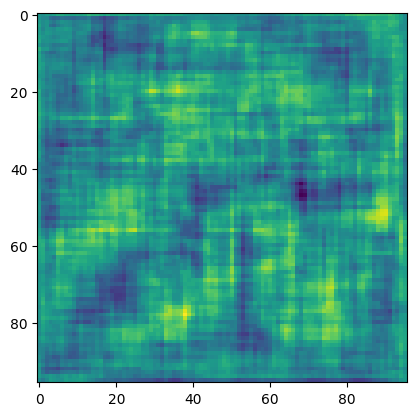

In [35]:
# Create a Deep Convolutional Generative Adversarial Network (DCGAN) generator model
dc_generator = create_dc_generator(seed_vector, img_chan)

# Generate a random noise vector of shape (1, seed_vector)
noise = tf.random.normal([1, seed_vector])

# Use the generator model to generate an image from the noise vector
gen_img = dc_generator(noise, training=False)

# Display the generated image using matplotlib
plt.imshow(gen_img[0, :, :, 0])

*11. Initialize the Generator for the vanilla GAN and view the output:*

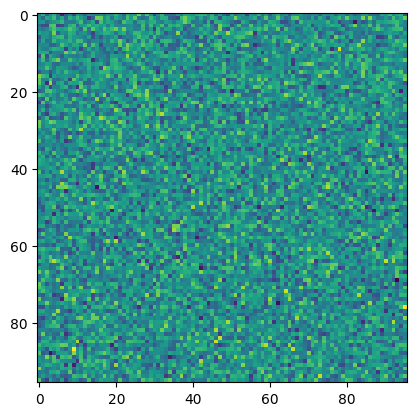

In [36]:
# Create a Generative Adversarial Network (GAN) generator model
generator = create_generator(seed_vector, img_chan)

# Use the generator model to generate an image from the noise vector
gen_van_img = generator(noise, training=False)

# Display the generated image using matplotlib
plt.imshow(gen_van_img[0, :, :, 0])

*12. Print the decision of the DCGAN Descriminator evaluated on the generated image(seed image):*

In [21]:
# Set the shape of the input images for the discriminator
img_shape = (gen_square, gen_square, img_chan)

# Create a discriminator model
dc_discriminator = create_discriminator(img_shape)

# Use the discriminator model to make a decision on the generated image
decision = discriminator(gen_img)

# Print the decision
print(decision)

tf.Tensor([[0.50221294]], shape=(1, 1), dtype=float32)


*13. Print the decision of the vanilla GAN evaluated on the seed image:*

In [22]:
# Create a discriminator model
discriminator = create_discriminator(img_shape)

# Use the discriminator model to make a decision on the generated image
decision = discriminator(gen_img)

# Print the decision
print(decision)

tf.Tensor([[0.49909833]], shape=(1, 1), dtype=float32)


*14. Create your loss functions. Since the output of both the discriminator and generator networks is different, you can define two separate loss functions for them. Moreover, they need to be trained separately in independent passes through the networks.*

In [37]:
# Define the binary cross-entropy loss function
cross_entropy = tf.keras.losses.BinaryCrossentropy()

def discrim_loss(real_output, fake_output):
    """
    This function calculates the discriminator loss for a Generative Adversarial Network (GAN).
    The loss is calculated as the sum of the binary cross-entropy losses for the real and fake outputs.
    """
    # Calculate the binary cross-entropy loss for the real output
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    
    # Calculate the binary cross-entropy loss for the fake output
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    
    # Calculate the total loss as the sum of the real and fake losses
    total_loss = real_loss + fake_loss

    return total_loss

def gen_loss(fake_output):
    """
    This function calculates the generator loss for a Generative Adversarial Network (GAN).
    The loss is calculated as the binary cross-entropy loss for the fake output.
    """
    # Calculate the binary cross-entropy loss for the fake output
    return cross_entropy(tf.ones_like(fake_output), fake_output)

*15. Create two Adam optimizers, one for the generator and one for the discriminator. Use the same learning rate and momentum for each*

In [38]:
# Define the Adam optimizer for the generator with a learning rate of 1.5e-4 and beta_1 of 0.5
gen_optimizer = tf.keras.optimizers.Adam(1.5e-4, 0.5)

# Define the Adam optimizer for the discriminator with a learning rate of 1.5e-4 and beta_1 of 0.5
disc_optimizer = tf.keras.optimizers.Adam(1.5e-4, 0.5)

*16. Create a function to return the Generator Loss and Discriminator Loss. Create real_output and fake_output for the discriminator:*

In [39]:
@tf.function
def train_step(generator, discriminator, images):
    """
    This function performs one training step for a Generative Adversarial Network (GAN).
    The `generator` and `discriminator` models are trained on a batch of `images`.
    """
    # Generate a random noise vector of shape (num_batch, seed_vector)
    seed = tf.random.normal([num_batch, seed_vector])

    # Record the operations performed by the generator and discriminator models
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:

        # Generate fake images using the generator model
        gen_imgs = generator(seed, training=True)
        
        # Make decisions on the real and fake images using the discriminator model
        real_output = discriminator(images, training=True)
        fake_output = discriminator(gen_imgs, training=True)

        # Calculate the generator and discriminator losses
        g_loss = gen_loss(fake_output)
        d_loss = discrim_loss(real_output, fake_output)

    # Calculate the gradients of the generator and discriminator losses with respect to their trainable variables
    gradients_of_generator = gen_tape.gradient(g_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(d_loss, discriminator.trainable_variables)

    # Update the trainable variables of the generator and discriminator models using their respective optimizers
    gen_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    disc_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return g_loss, d_loss

*17. Create a function to train the Generator and Discriminator Model:*

In [40]:
def train(generator, discriminator, dataset, epochs, prefix=None):
    """
    This function trains a Generative Adversarial Network (GAN) on a `dataset` of images 
    for a specified number of `epochs`.
    The `generator` and `discriminator` models are updated during training.
    """
    # Generate a fixed random noise vector to use for generating images during training
    fixed_seed = np.random.normal(0, 1, (img_rows * img_cols, seed_vector))

    start = time.time()

    for epoch in range(epochs):
        epoch_start = time.time()
        
        g_loss_list = []
        d_loss_list = []

        # Perform one training step for each batch of images in the dataset
        for image_batch in dataset:
            t = train_step(generator, discriminator, image_batch)
            g_loss_list.append(t[0])
            d_loss_list.append(t[1])

        # Calculate the average generator and discriminator losses for the epoch
        generator_loss = sum(g_loss_list) / len(g_loss_list)
        discriminator_loss = sum(d_loss_list) / len(d_loss_list)

        epoch_elapsed = time.time() - epoch_start

        # Print the generator and discriminator losses every 100 epochs
        if (epoch + 1) % 100 == 0:
            print(f'Epoch {epoch+1}, gen loss={generator_loss}, disc loss={discriminator_loss}, {time_string(epoch_elapsed)}')

        # Save generated images every epoch
        save_images(generator, epoch, fixed_seed, prefix)

    elapsed = time.time()-start
    print(f'Training time: {time_string(elapsed)}')

*18. Train the DCGAN model on your training dataset:*

In [27]:
# Train a Deep Convolutional Generative Adversarial Network (DCGAN) 
# on a dataset of images for a specified number of epochs
train(dc_generator, dc_discriminator, train_dataset, epochs, prefix='-dc-gan')

1/1 [==============================] - 0s 17ms/step
Epoch 100, gen loss=3.766249895095825, disc loss=24.636917114257812, 0:00:00.73
1/1 [==============================] - 0s 18ms/step
Epoch 200, gen loss=12.267191886901855, disc loss=10.854573249816895, 0:00:00.73
1/1 [==============================] - 0s 18ms/step
Epoch 300, gen loss=4.994309425354004, disc loss=37.08953857421875, 0:00:00.72
1/1 [==============================] - 0s 21ms/step
Epoch 400, gen loss=7.093033313751221, disc loss=8.499822616577148, 0:00:00.73
1/1 [==============================] - 0s 17ms/step
Epoch 500, gen loss=1.2919331789016724, disc loss=11.941913604736328, 0:00:00.73
1/1 [==============================] - 0s 28ms/step
Training time: 0:10:20.77


*19. Train the vanilla GAN Model on your training dataset:*

In [41]:
# Train a Generative Adversarial Network (GAN) 
# on a dataset of images for a specified number of epochs
train(generator, discriminator, train_dataset, epochs, prefix='-vanilla')

1/1 [==============================] - 0s 18ms/step
Epoch 100, gen loss=13.697425842285156, disc loss=9.013453563966323e-06, 0:00:00.59
1/1 [==============================] - 0s 23ms/step
Epoch 200, gen loss=13.584954261779785, disc loss=3.185880268574692e-05, 0:00:00.59
1/1 [==============================] - 0s 17ms/step
Epoch 300, gen loss=13.888184547424316, disc loss=1.3070143722870853e-05, 0:00:00.59
1/1 [==============================] - 0s 21ms/step
Epoch 400, gen loss=13.943519592285156, disc loss=8.744175829633605e-06, 0:00:00.59
1/1 [==============================] - 0s 20ms/step
Epoch 500, gen loss=13.786093711853027, disc loss=1.5297933714464307e-05, 0:00:00.59
1/1 [==============================] - 0s 17ms/step
Training time: 0:08:08.24


*20. View Bananas Images generated by DCGANs & vanilla GAN model on various epochs during training:*

* View Bananas Images generated by the DCGAN Model after the 100th epoch:

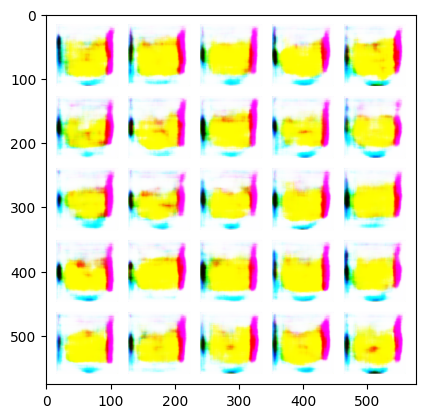

In [42]:
# Read an image from a file
a = imread('banana-or-orange/training_set/output/train-dc-gan-100.png')

# Display the image using matplotlib
plt.imshow(a)

* View Bananas Images generated by the vanilla Model after the 100th epoch:

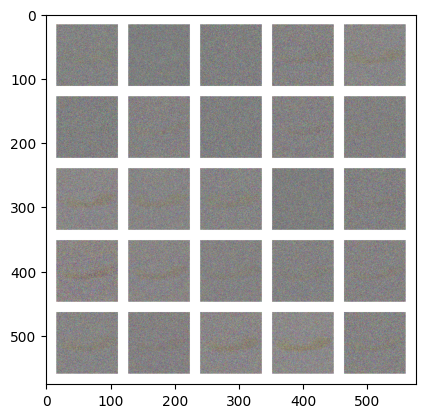

In [43]:
# Read an image from a file
a = imread('banana-or-orange/training_set/output/train-vanilla-100.png')

# Display the image using matplotlib
plt.imshow(a)

* View Bananas Images generated by the DCGAN Model after the 250th epoch:

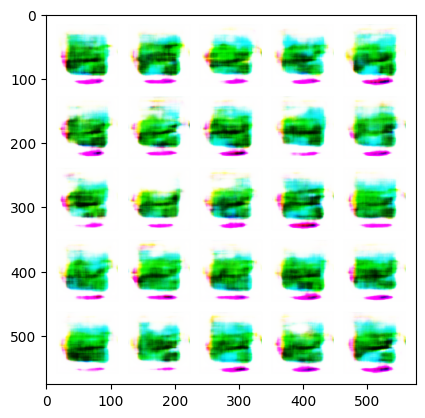

In [44]:
# Read an image from a file
a = imread('banana-or-orange/training_set/output/train-dc-gan-250.png')

# Display the image using matplotlib
plt.imshow(a)

* View Bananas Images generated by the vanilla Model after the 250th epoch

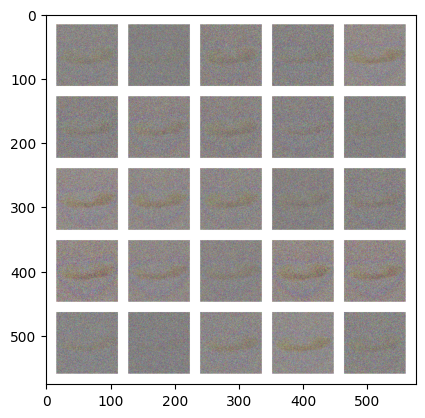

In [45]:
# Read an image from a file
a = imread('banana-or-orange/training_set/output/train-vanilla-250.png')

# Display the image using matplotlib
plt.imshow(a)

* View Bananas Images generated by the DCGAN Model after the 500th epoch

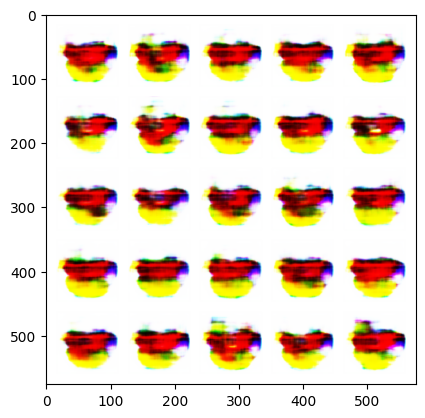

In [47]:
# Read an image from a file
a = imread('banana-or-orange/training_set/output/train-dc-gan-499.png')

# Display the image using matplotlib
plt.imshow(a)

* View Bananas Images generated by the vanilla Model after the 500th epoch

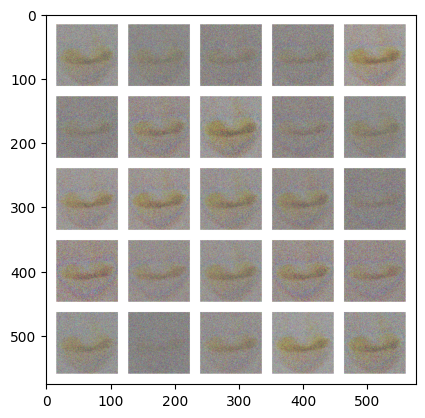

In [48]:
# Read an image from a file
a = imread('banana-or-orange/training_set/output/train-vanilla-499.png')

# Display the image using matplotlib
plt.imshow(a)

**The Banana Images generated by DCGAN Model looks more realistic than those generated by vanilla model.**

-------

-------

-------